In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [3]:
df = df.dropna()

In [4]:
print(df)

       gender   age  hypertension  heart_disease smoking_history   bmi  \
0      Female 80.00             0              1           never 25.19   
1      Female 54.00             0              0         No Info 27.32   
2        Male 28.00             0              0           never 27.32   
3      Female 36.00             0              0         current 23.45   
4        Male 76.00             1              1         current 20.14   
...       ...   ...           ...            ...             ...   ...   
99995  Female 80.00             0              0         No Info 27.32   
99996  Female  2.00             0              0         No Info 17.37   
99997    Male 66.00             0              0          former 27.83   
99998  Female 24.00             0              0           never 35.42   
99999  Female 57.00             0              0         current 22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0             6.60                  140         0  
1      

In [5]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
df = df.drop_duplicates()

number of duplicate rows:  (3854, 9)


In [6]:
df = df.drop("HbA1c_level", axis = 1)
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,140,0
1,Female,54.00,0,0,No Info,27.32,80,0
2,Male,28.00,0,0,never,27.32,158,0
3,Female,36.00,0,0,current,23.45,155,0
4,Male,76.00,1,1,current,20.14,155,0
5,Female,20.00,0,0,never,27.32,85,0
6,Female,44.00,0,0,never,19.31,200,1
7,Female,79.00,0,0,No Info,23.86,85,0
8,Male,42.00,0,0,never,33.64,145,0
9,Female,32.00,0,0,never,27.32,100,0


In [7]:
# Create a new column in the DataFrame for the new feature
glucose_level_column = df["blood_glucose_level"]
df["voltage_ratio"] = -0.276*glucose_level_column + 94.882
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes,voltage_ratio
0,Female,80.00,0,1,never,25.19,140,0,56.24
1,Female,54.00,0,0,No Info,27.32,80,0,72.80
2,Male,28.00,0,0,never,27.32,158,0,51.27
3,Female,36.00,0,0,current,23.45,155,0,52.10
4,Male,76.00,1,1,current,20.14,155,0,52.10
5,Female,20.00,0,0,never,27.32,85,0,71.42
6,Female,44.00,0,0,never,19.31,200,1,39.68
7,Female,79.00,0,0,No Info,23.86,85,0,71.42
8,Male,42.00,0,0,never,33.64,145,0,54.86
9,Female,32.00,0,0,never,27.32,100,0,67.28


In [8]:
df = df.drop("blood_glucose_level", axis=1)

In [9]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 1
    elif smoking_status == 'current':
        return 2
    elif smoking_status in ['ever', 'former', 'not current']:
        return 3

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

1    67276
3    19655
2     9197
Name: smoking_history, dtype: int64


In [10]:
# Define a function to map the existing categories to new ones
def recategorize_gender(gender_status):
    if gender_status == 'Male':
        return 1
    elif gender_status == 'Female':
        return 0

# Apply the function to the 'smoking_history' column
df['gender'] = df['gender'].apply(recategorize_gender)

# Check the new value counts
print(df['gender'].value_counts())

0    56161
1    39967
Name: gender, dtype: int64


In [11]:
df = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'voltage_ratio', 'diabetes']]

print(df)

       gender   age  hypertension  heart_disease  smoking_history   bmi  \
0           0 80.00             0              1                1 25.19   
1           0 54.00             0              0                1 27.32   
2           1 28.00             0              0                1 27.32   
3           0 36.00             0              0                2 23.45   
4           1 76.00             1              1                2 20.14   
...       ...   ...           ...            ...              ...   ...   
99994       0 36.00             0              0                1 24.60   
99996       0  2.00             0              0                1 17.37   
99997       1 66.00             0              0                3 27.83   
99998       0 24.00             0              0                1 35.42   
99999       0 57.00             0              0                2 22.43   

       voltage_ratio  diabetes  
0              56.24         0  
1              72.80         0  


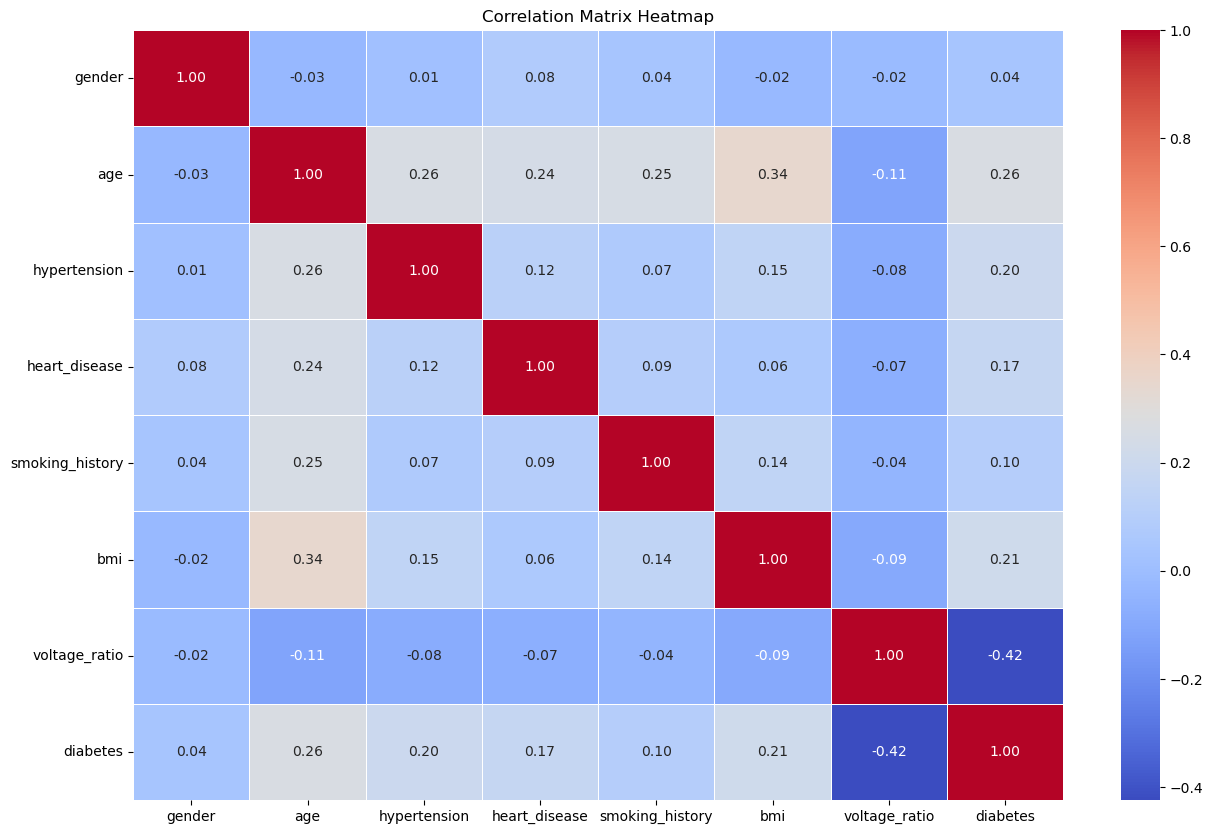

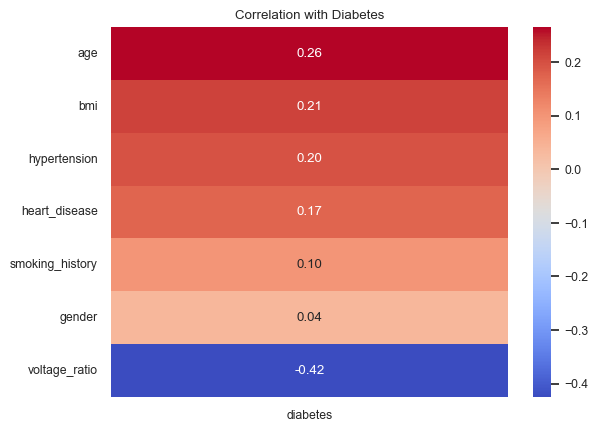

In [12]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [13]:
df_new = df.copy()


In [14]:
# Split data into features and target variable
X = df_new.drop('diabetes', axis=1)
y = df_new['diabetes']


In [15]:

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)

In [16]:

steps = [('o', over), ('u', under)]
pipeline = imbPipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [17]:
attribute_names =  list(df.columns[:-1])
class_name = 'diabetes'

def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
0    87646
1     8482
Name: diabetes, dtype: int64

Gini Impurity of the class is 0.161


In [18]:
def gini_split_a(attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for gender is 0.161
Gini for age is 0.148
Gini for hypertension is 0.155
Gini for heart_disease is 0.156
Gini for smoking_history is 0.159
Gini for bmi is 0.143
Gini for voltage_ratio is 0.099


In [19]:
min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(gini_class-min_value))

selected_attribute = min(gini_attiribute.items(), key=lambda item: item[1])[0]
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.099 
The maximum value of Gini Gain     : 0.0619 
The selected attiribute is:  voltage_ratio


{'gender': 0.0002303519916646568, 'age': 0.01269266009922454, 'hypertension': 0.006162046761746226, 'heart_disease': 0.00468849271752575, 'smoking_history': 0.0015504963973884678, 'bmi': 0.018316822245630165, 'voltage_ratio': 0.061937680205229856}
{'voltage_ratio': 0.061937680205229856, 'bmi': 0.018316822245630165, 'age': 0.01269266009922454, 'hypertension': 0.006162046761746226, 'heart_disease': 0.00468849271752575, 'smoking_history': 0.0015504963973884678, 'gender': 0.0002303519916646568}
           Feature  Importance
0    voltage_ratio        0.06
1              bmi        0.02
2              age        0.01
3     hypertension        0.01
4    heart_disease        0.00
5  smoking_history        0.00
6           gender        0.00


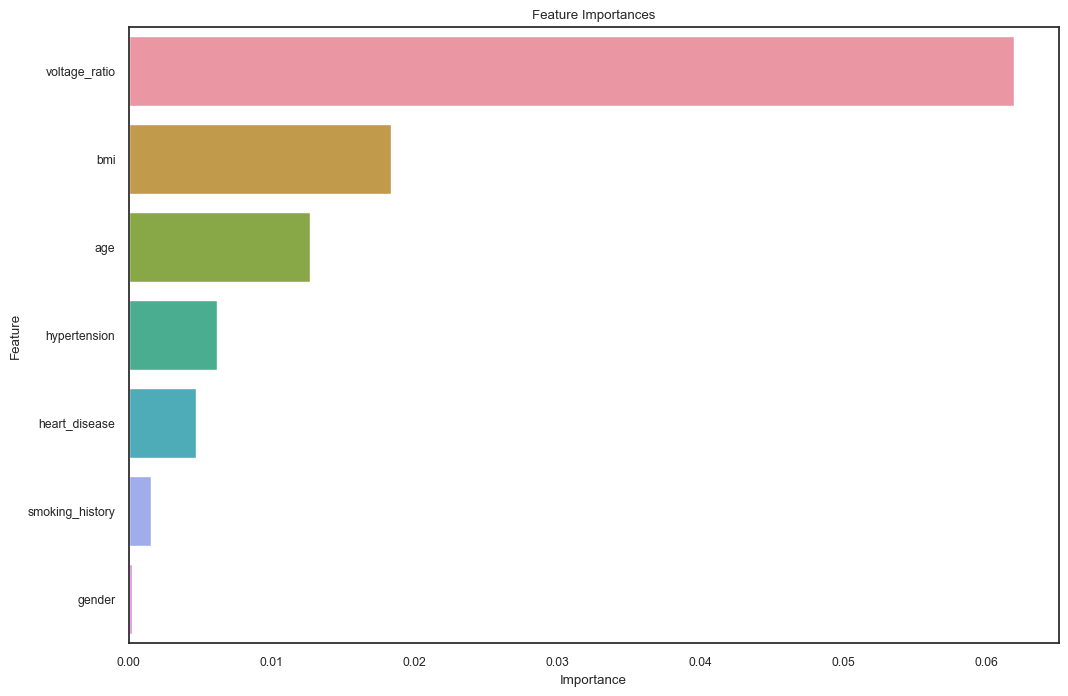

In [20]:
gini_attribute_gain = {key: gini_class - value for key, value in gini_attiribute.items()}

print(gini_attribute_gain)

gain_gini = {}
for item in sorted(gini_attribute_gain.items(), key=lambda item: item[1], reverse=True):
    gain_gini[item[0]] = item[1]

print(gain_gini)

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': gain_gini.keys(), 'Importance': gain_gini.values()})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

           Feature  Importance
0    voltage_ratio        0.06
1              bmi        0.02
2              age        0.01
3     hypertension        0.01
4    heart_disease        0.00
5  smoking_history        0.00
6           gender        0.00


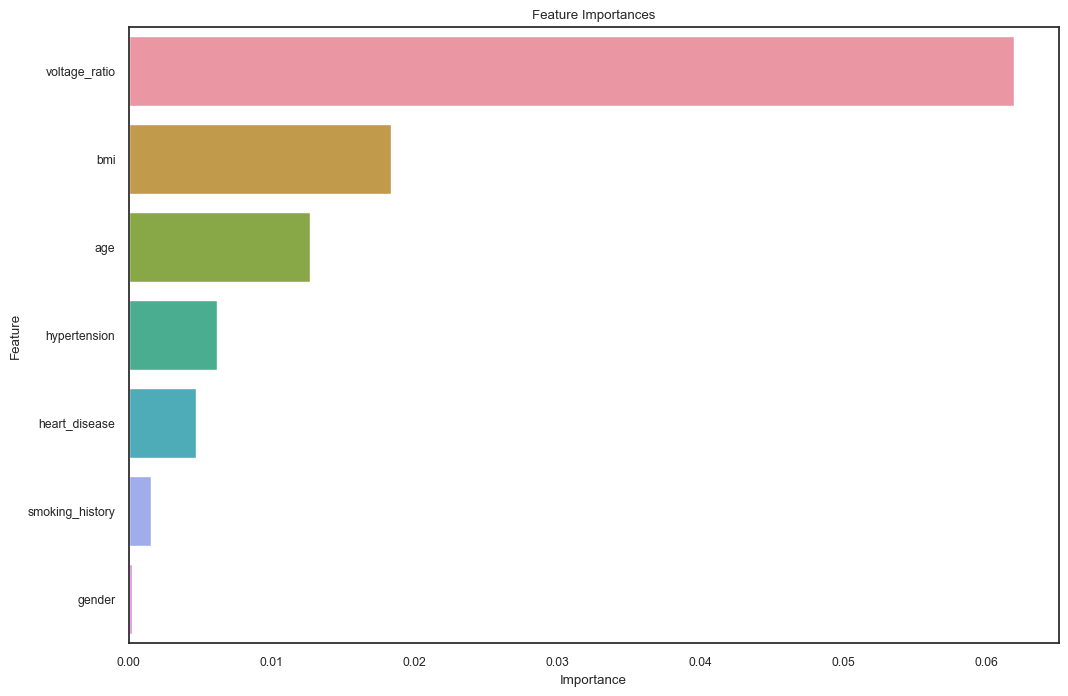

In [21]:
# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': gain_gini.keys(), 'Importance': gain_gini.values()})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [22]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,voltage_ratio
0,1,46.00,0,0,1,27.32,54.86
1,1,79.00,0,0,3,20.85,51.00
2,0,80.00,1,0,1,26.62,70.04
3,0,53.00,0,0,2,26.77,50.72
4,1,32.00,0,0,3,27.32,70.04
...,...,...,...,...,...,...,...
52582,0,38.55,0,0,1,32.34,28.64
52583,1,57.92,0,0,3,34.12,28.64
52584,0,49.24,0,0,1,27.32,12.08
52585,0,52.64,0,0,2,19.57,17.60


In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
52582    1
52583    1
52584    1
52585    1
52586    1
Name: diabetes, Length: 52587, dtype: int64

In [24]:
attribute_names =  list(X[:-1])
class_name = 'diabetes'

def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = y.value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
0    35058
1    17529
Name: diabetes, dtype: int64

Gini Impurity of the class is 0.444


In [25]:
def gini_split_a(attribute_name):
    attribute_values = X[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = y[X[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = X.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for gender is 0.444
Gini for age is 0.279
Gini for hypertension is 0.433
Gini for heart_disease is 0.436
Gini for smoking_history is 0.439
Gini for bmi is 0.242
Gini for voltage_ratio is 0.238


In [26]:
min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(gini_class-min_value))

selected_attribute = min(gini_attiribute.items(), key=lambda item: item[1])[0]
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.238 
The maximum value of Gini Gain     : 0.207 
The selected attiribute is:  voltage_ratio


{'gender': 0.0003154500724441567, 'age': 0.16589213062042896, 'hypertension': 0.01173422991818096, 'heart_disease': 0.008066632162128773, 'smoking_history': 0.005839008386665123, 'bmi': 0.20271526229968817, 'voltage_ratio': 0.20694375473494475}
{'voltage_ratio': 0.20694375473494475, 'bmi': 0.20271526229968817, 'age': 0.16589213062042896, 'hypertension': 0.01173422991818096, 'heart_disease': 0.008066632162128773, 'smoking_history': 0.005839008386665123, 'gender': 0.0003154500724441567}
           Feature  Importance
0    voltage_ratio        0.21
1              bmi        0.20
2              age        0.17
3     hypertension        0.01
4    heart_disease        0.01
5  smoking_history        0.01
6           gender        0.00


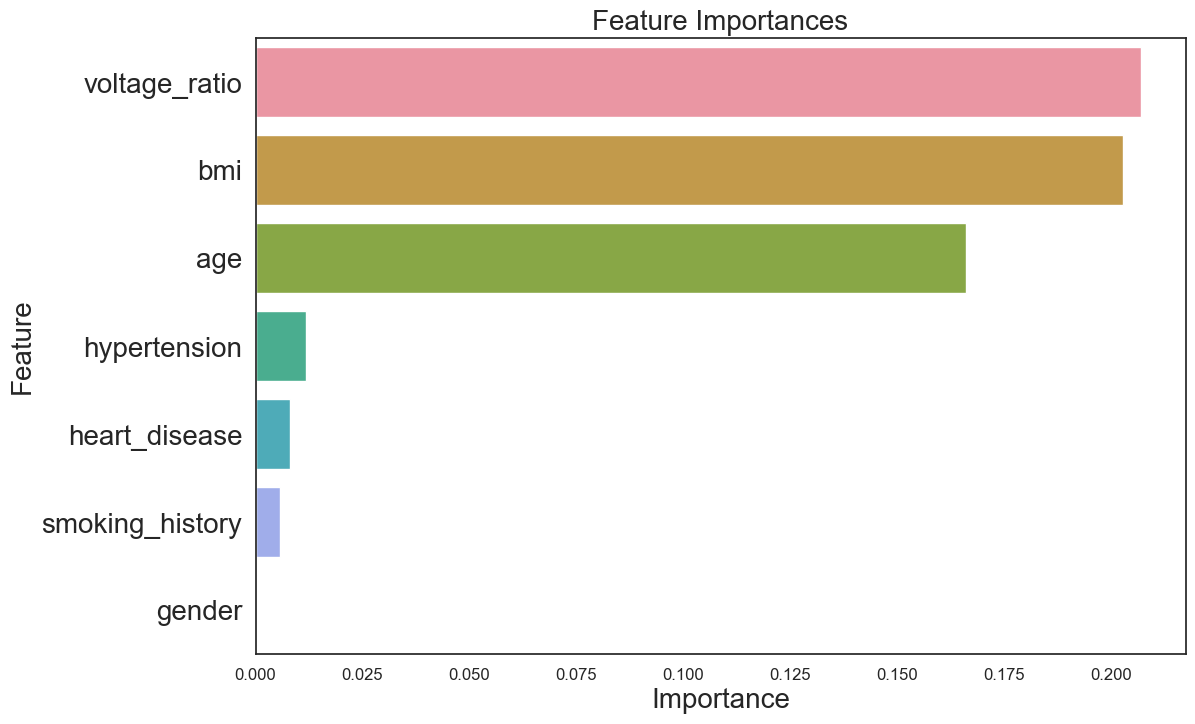

In [33]:
gini_attribute_gain = {key: gini_class - value for key, value in gini_attiribute.items()}

print(gini_attribute_gain)

gain_gini = {}
for item in sorted(gini_attribute_gain.items(), key=lambda item: item[1], reverse=True):
    gain_gini[item[0]] = item[1]

print(gain_gini)

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': gain_gini.keys(), 'Importance': gain_gini.values()})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Set font size for title
plt.title('Feature Importances', fontsize=20)

# Set font size for axis labels
plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20)

# Set font size for tick labels (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.show()

In [1]:
print('hellooooo there')

hellooooo there
